### Let's see what this looks like 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from src.data_funcs import BikeData
from src.plot_funcs import chart

## Let's see what this data looks like!

In [5]:
pd.read_csv('data/2017-fordgobike-tripdata.csv')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber


In [5]:
bike = BikeData('bike_data.pickle') #SEE the initial_read script for how I cleaned and pickled the data

In [6]:
bike.df

,year,month,date,hour,day_of_week,weekend,bike_id,user_type,revenue,duration_sec,distance,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,2018,Jan,31,22,Wed,False,2765,Subscriber,243,75284,1.545972,37.761420,-122.426435,37.783521,-122.431158
1,2018,Jan,31,16,Wed,False,2815,Customer,281,85422,0.000000,37.795392,-122.394203,37.795392,-122.394203
2,2018,Jan,31,14,Wed,False,3039,Customer,236,71576,1.846937,37.348759,-121.894798,37.325998,-121.877120
3,2018,Jan,31,14,Wed,False,321,Customer,200,61076,1.275856,37.773793,-122.421239,37.780955,-122.399749
4,2018,Jan,31,19,Wed,False,617,Subscriber,126,39966,1.518033,37.776435,-122.426244,37.788975,-122.403452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432349,2020,Feb,27,17,Thu,False,157125,Subscriber,0,2321,1.713986,37.810553,-122.476472,37.789625,-122.459580
432350,2020,Feb,01,18,Sat,True,648380,Customer,2,1526,0.244853,37.810568,-122.410974,37.807980,-122.414038
432351,2020,Feb,04,15,Tue,False,438416,Subscriber,0,2596,2.981923,37.810572,-122.476453,37.806278,-122.422227
432352,2020,Feb,25,20,Tue,False,926639,Customer,8,3072,0.467875,37.810688,-122.410335,37.807886,-122.418122


In [13]:
rentals_per_month = bike.rentals_per_month()
revenue_per_month = bike.revenue_per_month()

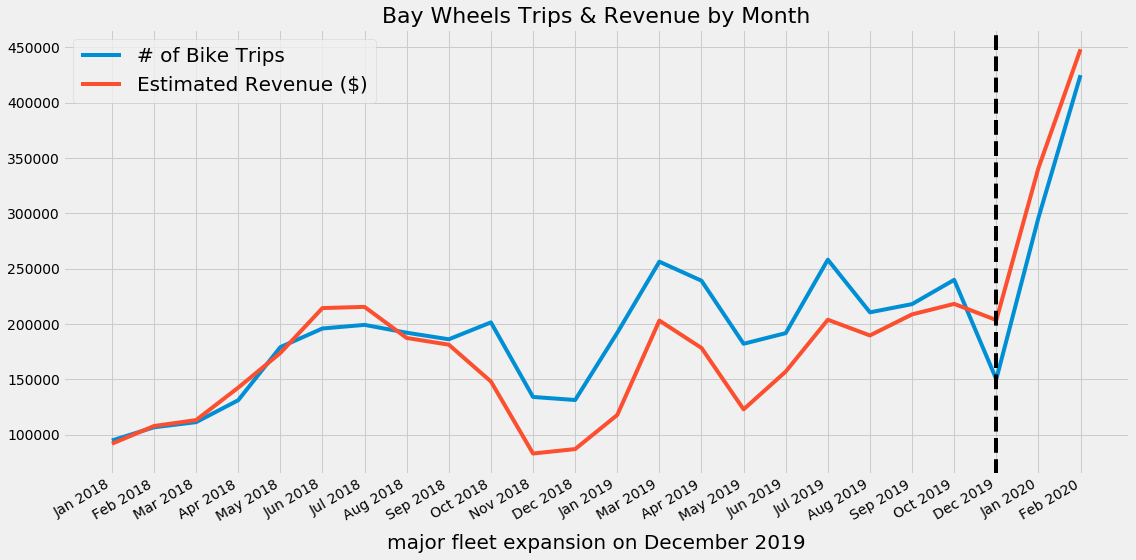

In [14]:
chart([rentals_per_month, revenue_per_month], kind='plot', name='Bay Wheels Trips & Revenue by Month', x_name='major fleet expansion on December 2019',
      legend=('# of Bike Trips', 'Estimated Revenue ($)'), line=['Dec 2019'])
#plt.savefig('Growth.png')

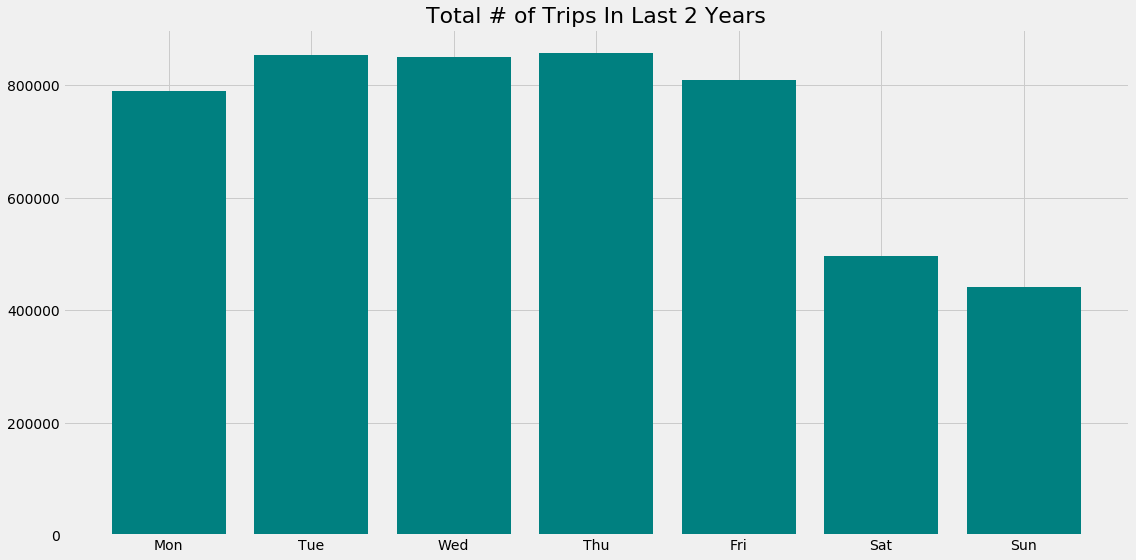

In [20]:
daily_popularity = bike.weekly_popularity()
chart([daily_popularity], kind='bar', name='Total # of Trips In Last 2 Years', fmt=False)
plt.savefig('Charts/TripsperDay.png')

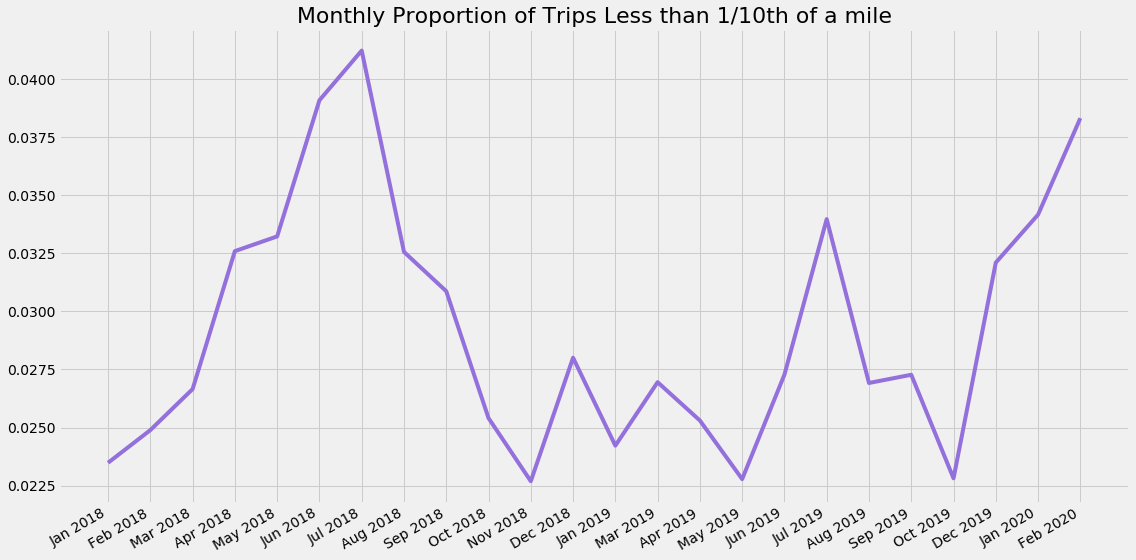

In [17]:
short_trips = bike.monthly_short_trips()
chart([short_trips], kind='plot', name='Monthly Proportion of Trips Less than 1/10th of a mile')
plt.savefig('Charts/ShortTripsProportion.png')

In [76]:
duration = bike.df[bike.df.duration_sec < 60*30]
sample = duration.sample(10**5, replace=False)

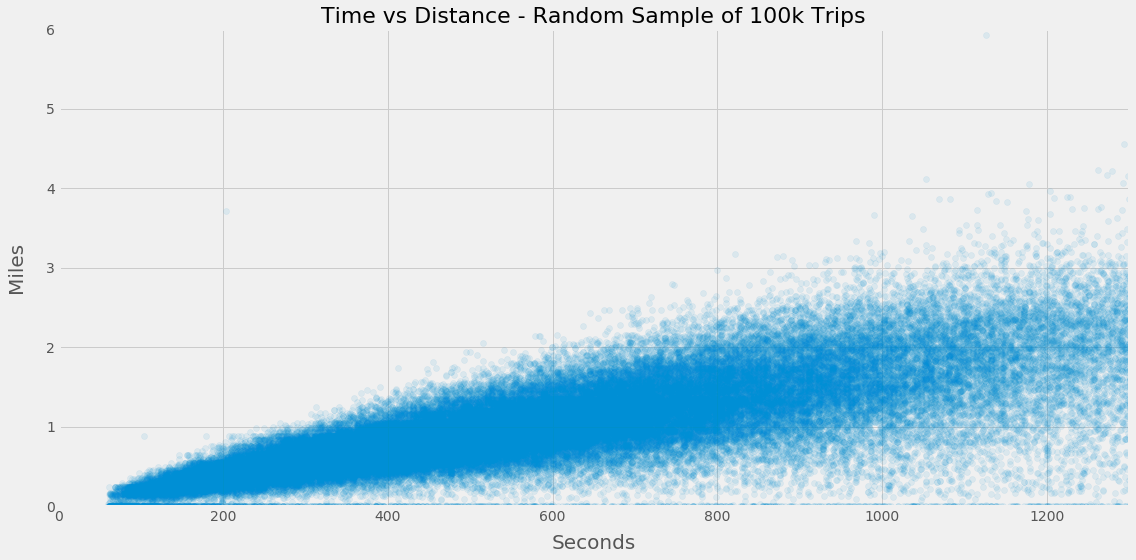

In [130]:
chart([sample.duration_sec, sample.distance], kind='scatter', name='Time vs Distance - Random Sample of 100k Trips', x_name='Seconds', y_name='Miles', fmt=False)
#plt.savefig('TimevDistance.png')

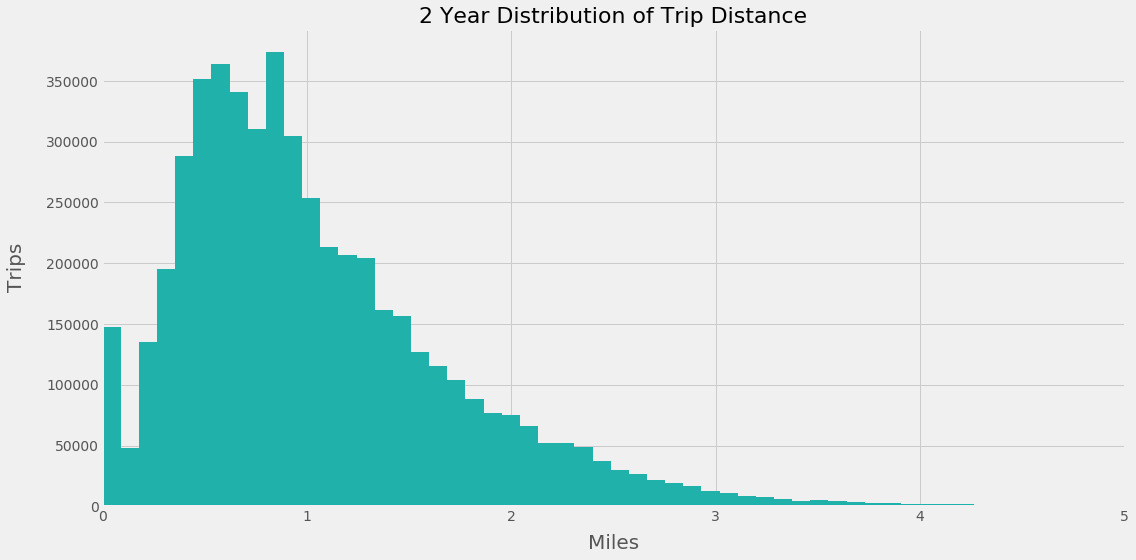

In [120]:
chart([bike.df.distance], kind='hist', name='2 Year Distribution of Trip Distance', x_name='Miles', y_name='Trips', b=[10**3, 0, 5], fmt=False)
#plt.savefig('TripDistanceDistribution.png')

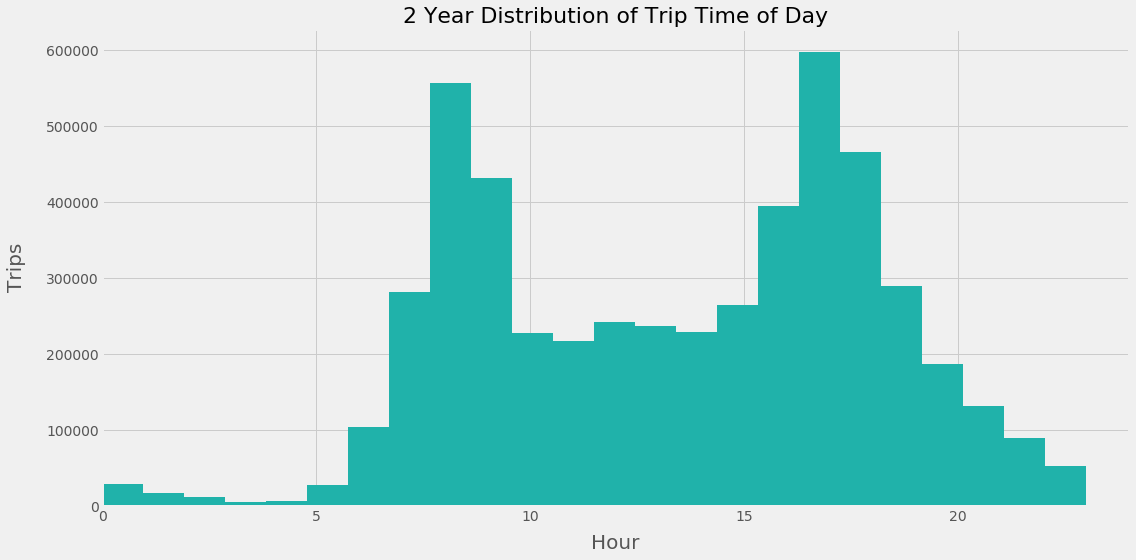

In [118]:
chart([bike.df.hour], kind='hist', name='2 Year Distribution of Trip Time of Day', x_name='Hour', y_name='Trips', b=[24,0,24], fmt=False)
#plt.savefig('TripTimeDistribution.png')

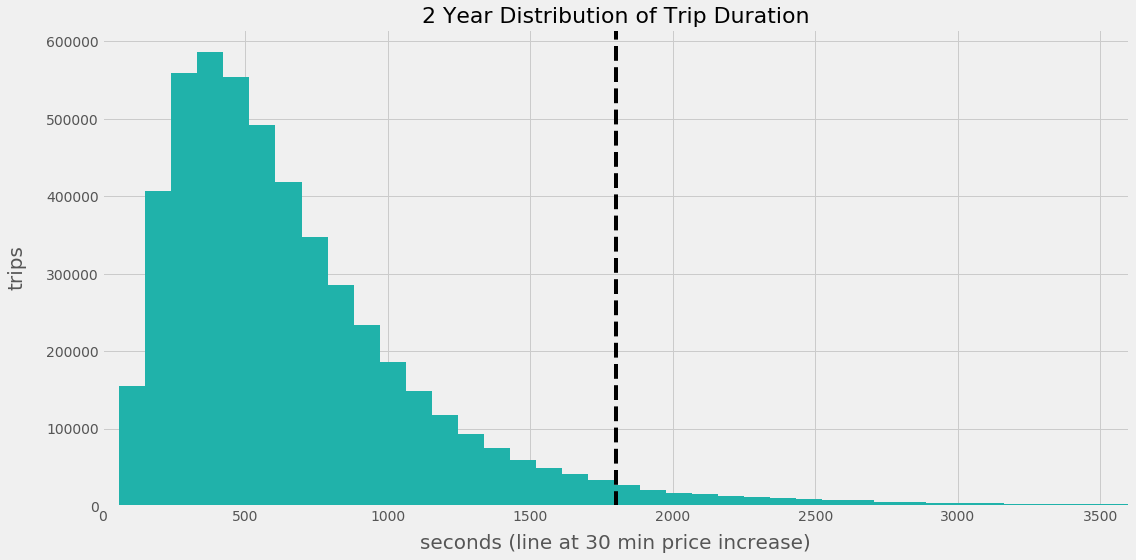

In [121]:
time = bike.df.duration_sec
chart([time], kind='hist', name='2 Year Distribution of Trip Duration', x_name='seconds (line at 30 min price increase)', y_name='trips', b=[10**4, 0, 60*60], line=[60*30], fmt=False)
#plt.savefig('TripDurationDistribution.png')

#### Surprised to see that without fail, weekend trips are taken a less than proportionately normal amount!


In [12]:
bike.df[bike.df.user_type == 'Customer'].groupby('weekend').duration_sec.mean() / 60

weekend
False    20.453019
True     29.682869
Name: duration_sec, dtype: float64

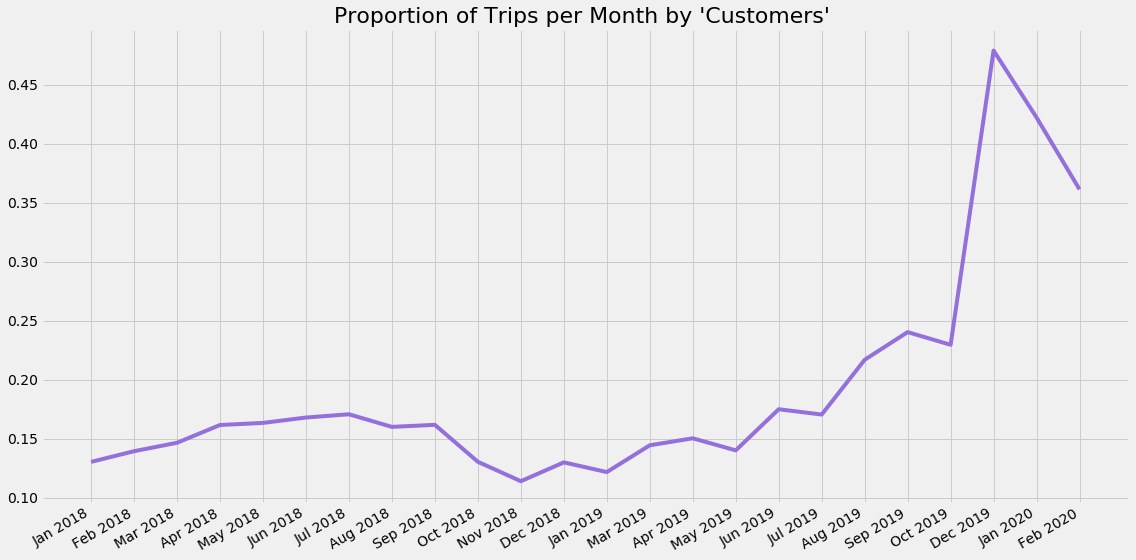

In [9]:
monthly_customers = bike.proportion_of_customers()
chart([monthly_customers], kind='plot', name="Proportion of Trips per Month by 'Customers' ")
plt.savefig('Charts/CustomerProportion.png')

In [6]:
wkday_dist, wkend_dist = bike.weekday_v_weekend_distances()
wkday_dur, wkend_dur = bike.weekday_v_weekend_times()
wkday_prof, wkend_prof = bike.weekday_v_weekend_profits()
wkday_cust, wkend_cust = bike.weekday_v_weekend_customers()

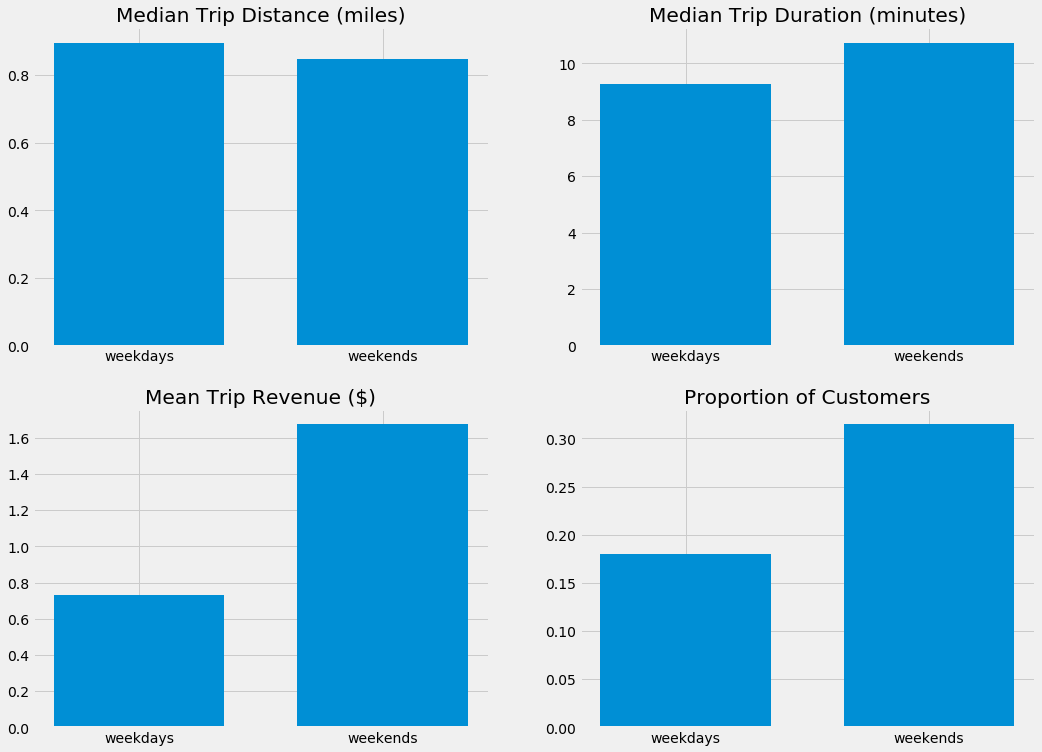

In [7]:
graph_list = [[wkday_dist, wkend_dist], [wkday_dur, wkend_dur], 
              [wkday_prof, wkend_prof], [wkday_cust, wkend_cust]]
graph_names = ['Median Trip Distance (miles)', 'Median Trip Duration (minutes)', 
                'Mean Trip Revenue ($)', 'Proportion of Customers']
fig, axs = plt.subplots(2, 2, figsize=(16,12))
xt = ['weekdays', 'weekends']
for i, ax in enumerate(axs.flatten()):
    ax.bar(xt, graph_list[i], width=.7)
    ax.set_xticks(xt)
    ax.set_title(graph_names[i])

plt.savefig('Charts/Week_v_end.png')

### PROBABILITY OF A CASUAL BIKE RENT BEING A BIG TICKET CUSTOMER

In [16]:
bool_mask = (bike.df.month == 'Dec') & (bike.df.year == '2019')
idx = bool_mask.to_numpy().nonzero()[0][0]

In [20]:
before_grp = bike.df.iloc[:idx]
after_grp = bike.df.iloc[idx:]#[bike.df.user_type == 'Customer']
before_grp[before_grp.user_type == 'Customer']

,year,month,date,hour,day_of_week,weekend,bike_id,user_type,revenue,duration_sec,distance,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
1,2018,Jan,31,16,Wed,False,2815,Customer,281,85422,0.000000,37.795392,-122.394203,37.795392,-122.394203
2,2018,Jan,31,14,Wed,False,3039,Customer,236,71576,1.846937,37.348759,-121.894798,37.325998,-121.877120
3,2018,Jan,31,14,Wed,False,321,Customer,200,61076,1.275856,37.773793,-122.421239,37.780955,-122.399749
5,2018,Jan,31,22,Wed,False,1306,Customer,20,6477,0.684546,37.803686,-122.282497,37.805318,-122.294837
10,2018,Jan,31,23,Wed,False,1278,Customer,2,1316,1.601926,37.765052,-122.421866,37.785881,-122.408915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185241,2019,Nov,22,9,Fri,False,399513,Customer,32,10396,0.007594,37.766036,-122.395929,37.765950,-122.395843
185309,2019,Nov,05,14,Tue,False,283550,Customer,11,4390,0.001138,37.774606,-122.413977,37.774591,-122.413985
185455,2019,Nov,22,12,Fri,False,865850,Customer,2,690,0.760083,37.776680,-122.392241,37.766011,-122.395721
185460,2019,Nov,23,12,Sat,True,338364,Customer,5,2403,0.000000,37.781452,-122.454352,0.000000,0.000000


In [10]:
big_money = bike.big_money_probability()

In [12]:
before_normal = stats.norm(big_money[0][0], big_money[0][1])
after_normal = stats.norm(big_money[1][0], big_money[1][1])

In [11]:
big_money[0][0], big_money[1][0]

(0.1627136713656959, 0.06587078372098976)

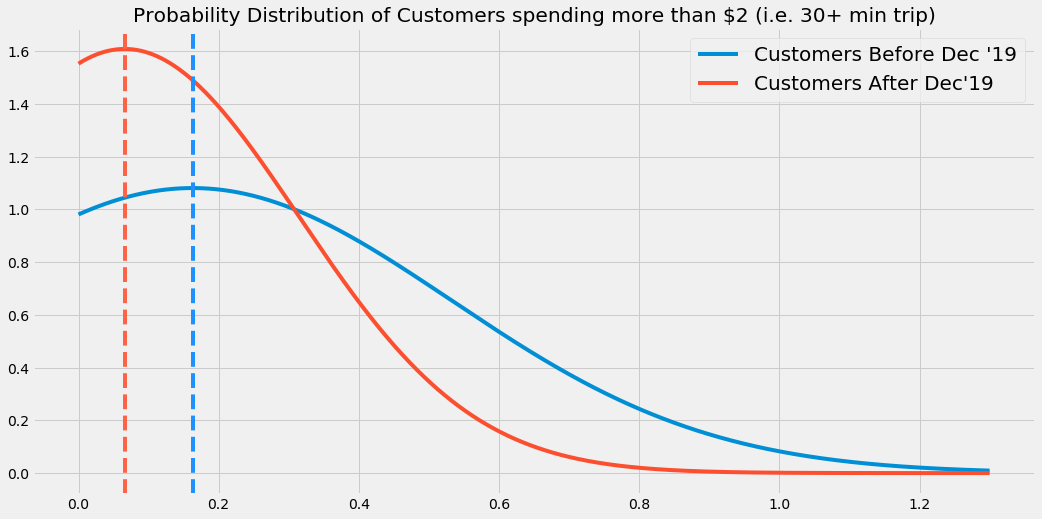

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
x = np.linspace(0, 1.3, num = 10**5)
ax.plot(x, before_normal.pdf(x))
ax.plot(x, after_normal.pdf(x))
ax.set_title('Probability Distribution of Customers spending more than $2 (i.e. 30+ min trip)')
ax.legend(["Customers Before Dec '19", "Customers After Dec'19"], fontsize=20)
ax.axvline(big_money[0][0], linestyle='--', color='dodgerblue')
ax.axvline(big_money[1][0], linestyle='--', color='tomato')
plt.savefig('BigMoneyDistribution.png')

# MISCELLANEOUS INSIGHTS NOT CHARTED

In [8]:
#AVG number of trips per month more expensive than $150
bike.df[bike.df.revenue > 150].groupby(['month', 'year']).revenue.size().mean()

118.65384615384616

In [9]:
#AVG number of trips per month more expensive than $50
bike.df[bike.df.revenue > 50].groupby(['month', 'year']).revenue.size().mean()

337.85185185185185

In [16]:
#AVG number of trips per day
bike.df.groupby(['year', 'month', 'date']).size().mean()

6446.159292035398

In [17]:
#AVG number of trips per weekday
bike.df[bike.df.weekend == False].groupby(['year', 'month', 'date']).size().mean()

7364.821238938053

In [18]:
#AVG number of trips per weekend
bike.df[bike.df.weekend == True].groupby(['year', 'month', 'date']).size().mean()

4149.504424778761